# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read the dataset and check the first five rows
inpl = pd.read_csv(r'Goodle_Playstore.csv')
inpl.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [3]:
#Check the shape of the dataframe
inpl.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [4]:
#Check the datatypes of all the columns of the dataframe
inpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null float64
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [5]:
#Check the number of null values in the columns
inpl.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [6]:
#Drop the rows having null values in the Rating field
inpl1 = inpl[~inpl.Rating.isnull()]
# inpl['Rating'] = inpl['Rating'].dropna()
#Check the shape of the dataframe
inpl1.shape

(9367, 13)

In [7]:
# Check the number of nulls in the Rating field again to cross-verify
inpl1.Rating.isnull().sum()

0

In [8]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values

inpl1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [9]:
#Inspect the nulls in the Android Version column
# inpl1['Android Ver'].isna().sum()
inpl1[inpl1['Android Ver'].isnull()]

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

In [10]:
inpl1.loc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                              21516.5
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [11]:
inpl1[(inpl1['Android Ver'].isnull() & (inpl1.Category == "1.9"))]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

               Size Installs Type     Price Content Rating             Genres  \
10472  21516.529524     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [12]:
#Drop the row having shifted values
inpl1 = inpl1[~(inpl1['Android Ver'].isnull() & (inpl1.Category == "1.9"))]
# inpl1[inpl1['Android Ver'].isnull()]
inpl1[inpl1['Android Ver'].isnull()]
#Check the nulls againin Android version column to cross-verify

App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5     189   2100.0   

     Installs  Type  Price Content Rating           Genres    Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization   July 20, 2018   
4490  10,000+  Free      0       Everyone  Personalization  March 27, 2018   

     Current Ver Android Ver  
4453         4.4         NaN  
4490         1.1         NaN

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [13]:
#Check the most common value in the Android version column
inpl1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 8.0                2
4.1 - 7.1.1              1
5.0 - 6.0                1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [14]:
inpl1['Android Ver'].mode()[0]

'4.1 and up'

In [15]:
#Fill up the nulls in the Android Version column with the above value
inpl1['Android Ver'] = inpl1['Android Ver'].fillna(inpl1['Android Ver'].mode()[0])

In [16]:
#Check the nulls in the Android version column again to cross-verify
inpl1['Android Ver'].isnull().sum()

0

In [17]:
#Check the nulls in the entire dataframe again
inpl1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [18]:
#Check the most common value in the Current version column
inpl1['Current Ver'].value_counts()

Varies with device     1415
1.0                     458
1.1                     195
1.2                     126
1.3                     120
2.0                     119
1.0.1                    80
1.4                      77
1.5                      73
1.0.0                    69
1.6                      58
1.0.2                    54
2.1                      52
1.0.4                    48
1.7                      47
1.0.3                    45
1.2.1                    44
1.0.6                    43
2.0.0                    41
3.0                      41
1.0.5                    41
1.8                      39
1.1.0                    38
1.2.0                    36
4.0                      34
2.3.2                    33
1.9                      33
2.4                      33
1.0.9                    32
1.1.1                    31
                       ... 
1.3 acremotecontrol       1
32                        1
300000.1.11               1
1.0.3.1                   1
1.8.4.5             

In [19]:
#Replace the nulls in the Current version column with the above value

inpl1['Current Ver'] = inpl1['Current Ver'].fillna(inpl1['Current Ver'].mode()[0])

In [20]:
# Question : Check the most common value in the Current version column again
inpl1['Current Ver'].mode()[0]

'Varies with device'

#### Handling Incorrect Data Types 

In [21]:
#Check the datatypes of all the columns 
inpl1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null object
Size              9366 non-null float64
Installs          9366 non-null object
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9366 non-null object
Android Ver       9366 non-null object
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [22]:
inpl1.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

  Reviews     Size    Installs  Type Price Content Rating  \
0     159  19000.0     10,000+  Free     0       Everyone   
1     967  14000.0    500,000+  Free     0       Everyone   
2   87510   8700.0  5,000,000+  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up  
2               Art & Design    August 1, 2018       1.2.4  4.0.3 and up

In [23]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 
try:
    inpl1['Android Ver'] = np.where(inpl1['Android Ver'] == "4.1 and up",np.mean(inpl1['Price']),inpl1['Price'])
    print('success')
except:
    print('unsuccess')

unsuccess


In [24]:
#Analyse the Price column to check the issue
inpl1.Price.value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
$3.99        58
$1.49        31
$2.49        21
$5.99        18
$9.99        16
$6.99        13
$399.99      11
$14.99       10
$4.49         9
$3.49         7
$7.99         7
$29.99        6
$11.99        5
$12.99        5
$19.99        5
$24.99        5
$8.99         4
$10.00        3
$16.99        3
$5.49         3
$3.95         2
$33.99        2
$7.49         2
$10.99        2
$79.99        2
           ... 
$3.02         1
$4.77         1
$4.60         1
$6.49         1
$39.99        1
$299.99       1
$1.29         1
$15.99        1
$37.99        1
$2.90         1
$2.50         1
$14.00        1
$2.59         1
$1.75         1
$1.20         1
$4.84         1
$2.95         1
$2.56         1
$379.99       1
$2.00         1
$389.99       1
$19.40        1
$3.28         1
$1.50         1
$8.49         1
$4.59         1
$3.04         1
$13.99        1
$4.29         1
$3.90         1
Name: Price, Length: 73,

In [25]:
#Write the function to make the changes
inpl1['Price'] = inpl1['Price'].apply(lambda x: 0 if x == '0' else float(x[1:]))

In [26]:
#Verify the dtype of Price once again
inpl1.Price.value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
3.99        58
1.49        31
2.49        21
5.99        18
9.99        16
6.99        13
399.99      11
14.99       10
4.49         9
3.49         7
7.99         7
29.99        6
12.99        5
19.99        5
24.99        5
11.99        5
8.99         4
10.00        3
16.99        3
5.49         3
79.99        2
7.49         2
33.99        2
10.99        2
1.00         2
          ... 
1.97         1
3.04         1
39.99        1
2.00         1
14.00        1
1.75         1
2.50         1
1.50         1
3.02         1
1.20         1
4.60         1
3.08         1
19.40        1
4.59         1
15.46        1
8.49         1
15.99        1
18.99        1
379.99       1
2.95         1
13.99        1
37.99        1
6.49         1
4.29         1
400.00       1
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

In [27]:
#Analyse the Reviews column
inpl1.Reviews.value_counts()

2           83
3           78
4           74
5           74
1           67
7           62
6           62
8           57
12          53
10          46
9           39
11          39
13          37
17          36
19          33
16          31
14          30
21          29
20          28
25          27
15          26
18          25
33          24
27          23
22          23
38          23
28          22
30          22
24          21
26          20
            ..
14955        1
66791        1
41420        1
1745         1
1308         1
2807         1
806          1
14653        1
49971        1
135337       1
13275        1
56444        1
6715         1
43645        1
235486       1
30693        1
2802         1
42197        1
325738       1
51973        1
99559        1
1212         1
14563        1
1422858      1
29944        1
17714850     1
48082        1
28510        1
37517        1
5152         1
Name: Reviews, Length: 5992, dtype: int64

In [28]:
#Change the dtype of this column
inpl1.Reviews = inpl1.Reviews.astype('int')

#Check the quantitative spread of this dataframe
inpl1.Reviews.describe()


count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [29]:
#Analyse the Installs Column
inpl1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [30]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
inpl1.Installs = [int(val.replace(',','').replace('+','')) for val in inpl1.Installs]

In [31]:
inpl1.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510   8700.0   5000000  Free    0.0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up  
2               Art & Design    August 1, 2018       1.2.4  4.0.3 and up

In [32]:
inpl1.describe()

Rating       Reviews           Size      Installs        Price
count  9366.000000  9.366000e+03    9366.000000  9.366000e+03  9366.000000
mean      4.191757  5.140498e+05   22705.733753  1.789744e+07     0.960928
std       0.515219  3.144042e+06   21305.040123  9.123822e+07    15.816585
min       1.000000  1.000000e+00       8.500000  1.000000e+00     0.000000
25%       4.000000  1.862500e+02    6600.000000  1.000000e+04     0.000000
50%       4.300000  5.930500e+03   21000.000000  5.000000e+05     0.000000
75%       4.500000  8.153275e+04   27000.000000  5.000000e+06     0.000000
max       5.000000  7.815831e+07  100000.000000  1.000000e+09   400.000000

In [33]:
inpl1.Installs.dtype

dtype('int64')

In [34]:
inpl1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


Average rating between 1-5

In [35]:
#Perform the sanity checks on the Reviews column
inpl1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [36]:
inpl1[inpl1.Reviews > inpl1.Installs].shape
inpl1 = inpl1[inpl1.Reviews <= inpl1.Installs]

In [37]:
#perform the sanity checks on prices of free apps 
inpl1.Price.describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

For free apps, the Price should not be nore than 0

In [38]:
inpl1[(inpl1.Type == 'Free') & (inpl1.Price > 0)]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [39]:
#IQR
inpl1['Price'].describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [40]:
#import the plotting libraries
import matplotlib.pyplot as plt

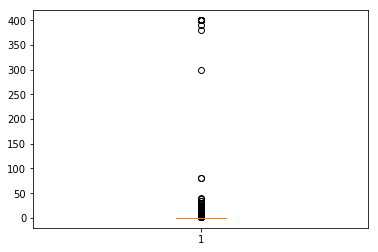

In [41]:
#Create a box plot for the price column
plt.boxplot(inpl1['Price']);

In [42]:
#Check the apps with price more than 200
inpl1[inpl1['Price'] >200].head()

App   Category  Rating  Reviews     Size  Installs  \
4197    most expensive app (H)     FAMILY     4.3        6   1500.0       100   
4362                💎 I'm rich  LIFESTYLE     3.8      718  26000.0     10000   
4367  I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300.0     10000   
5351                 I am rich  LIFESTYLE     3.8     3547   1800.0    100000   
5354            I am Rich Plus     FAMILY     4.0      856   8700.0     10000   

      Type   Price Content Rating         Genres      Last Updated  \
4197  Paid  399.99       Everyone  Entertainment     July 16, 2018   
4362  Paid  399.99       Everyone      Lifestyle    March 11, 2018   
4367  Paid  400.00       Everyone      Lifestyle       May 3, 2018   
5351  Paid  399.99       Everyone      Lifestyle  January 12, 2018   
5354  Paid  399.99       Everyone  Entertainment      May 19, 2018   

     Current Ver   Android Ver  
4197         1.0    7.0 and up  
4362       1.0.0    4.4 and up  
4367       1.0.1    4.1 and up  
5351         2.0  4.0.3 and up  
5354         3.0    4.4 and up

In [43]:
#Clean the Price column
inpl1 = inpl1[inpl1['Price'] < 200]

In [44]:
#Create a box plot for paid apps
inpl1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

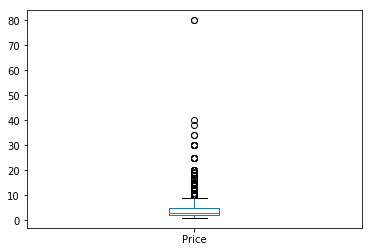

In [45]:
#Check the apps with price more than 30
inpl1[inpl1.Price > 0].Price.plot.box()

In [46]:
inpl1[inpl1.Price > 30].shape

(6, 13)

In [47]:
#Clean the Price column again
inpl1 = inpl1[inpl1.Price <= 30]
inpl1.shape

(9338, 13)

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

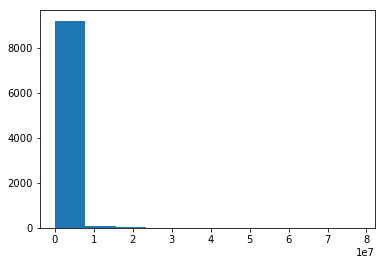

In [48]:
#Create a histogram of the Reviews
#?plt.hist
plt.hist(inpl1.Reviews)
# plt.figure(figsize = (12,20))
plt.show()

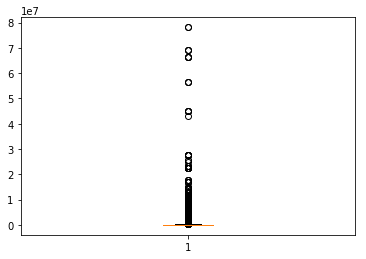

In [49]:
#Create a boxplot of the Reviews column
plt.boxplot(inpl1.Reviews)
plt.show()

In [50]:
#Check records with 10 million reviews
inpl1[inpl1.Reviews >= 10000000].shape

(92, 13)

In [51]:
#Check records with 1 million reviews
inpl1[inpl1.Reviews <= 1000000].shape

(8634, 13)

In [52]:
#Drop the above records (elect records <=1M)
inpl1 = inpl1[inpl1.Reviews <= 1000000]

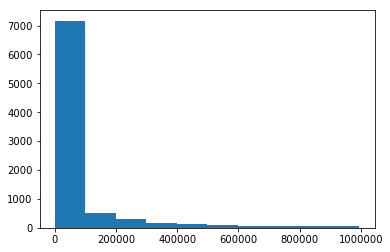

In [53]:
#Question - Create a histogram again and check the peaks

plt.hist(inpl1.Reviews)
plt.show()

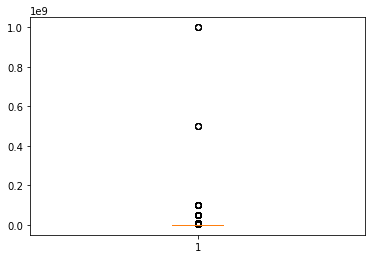

In [54]:
#Question - Create a box plot for the Installs column and report back the IQR

plt.boxplot(inpl1.Installs)
plt.show()

In [55]:
inpl1.Installs.describe()

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [56]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inpl1[inpl1.Installs <= 100000000].shape

(8624, 13)

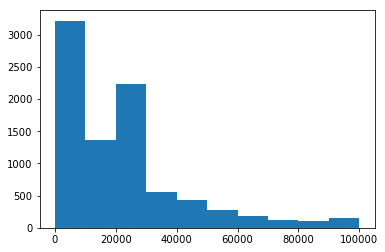

In [57]:
#Plot a histogram for Size as well.
plt.hist(inpl1.Size)
plt.show()

In [58]:
#Question - Create a boxplot for the Size column and report back the median value
inpl1['Size'].describe()

count      8634.000000
mean      21636.459060
std       20663.668474
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [59]:
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

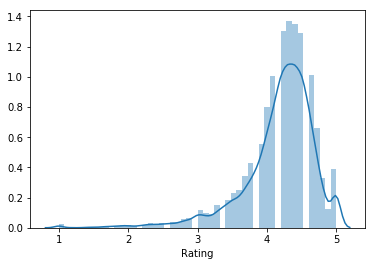

In [60]:
#Create a distribution plot for rating
sns.distplot(inpl1.Rating);

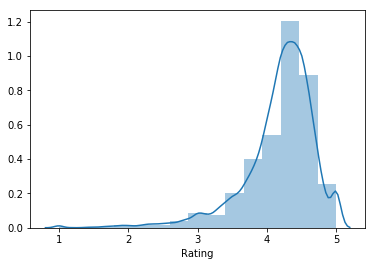

In [61]:
#Change the number of bins
sns.distplot(inpl1.Rating, bins = 15);


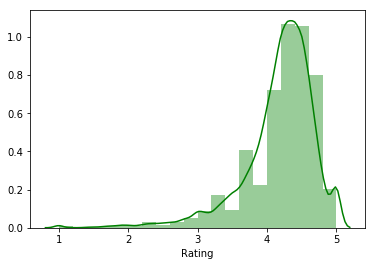

In [62]:
#Change the colour of bins to green
sns.distplot(inpl1.Rating,bins = 20, color = 'g');

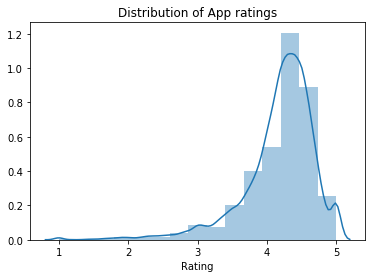

In [63]:
#Apply matplotlib functionalities
sns.distplot(inpl1.Rating,bins = 15);
plt.title('Distribution of App ratings',fontsize = 12)
plt.show()

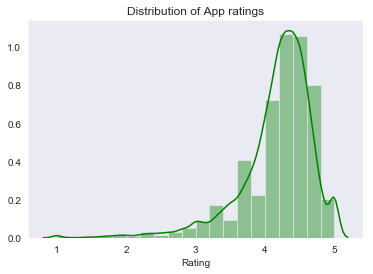

In [64]:
sns.set_style('dark')
sns.distplot(inpl1.Rating, bins =20, color = 'g')
plt.title('Distribution of App ratings',fontsize = 12)
plt.show()

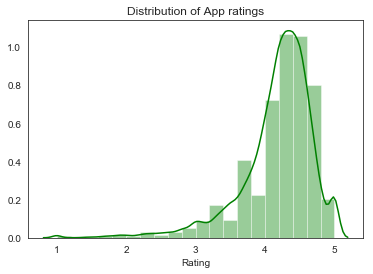

In [65]:
sns.set_style('white')
sns.distplot(inpl1.Rating, bins =20, color = 'g')
plt.title('Distribution of App ratings',fontsize = 12)
plt.show()

#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

In [66]:
#Check all the styling options
plt.style.available


['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

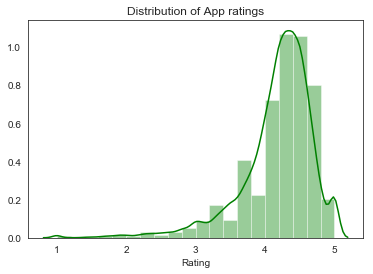

In [67]:
#Change the number of bins to 20
plt.style.use('tableau-colorblind10')
# sns.set_style('dark')
sns.distplot(inpl1.Rating, bins =20, color = 'g')
plt.title('Distribution of App ratings',fontsize = 12)
plt.show()

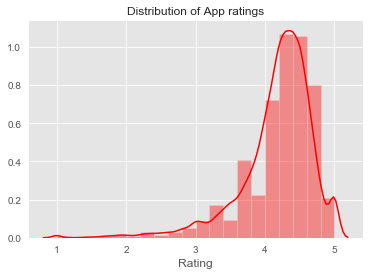

In [68]:
plt.style.use('ggplot')
sns.distplot(inpl1.Rating, bins =20, color = 'r')
plt.title('Distribution of App ratings',fontsize = 12)
plt.show()

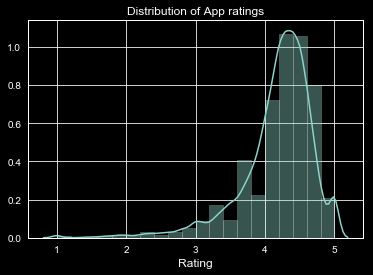

In [69]:
plt.style.use('dark_background')
sns.distplot(inpl1.Rating, bins =20)
plt.title('Distribution of App ratings',fontsize = 12)
plt.show()

In [70]:
plt.style.use('default')#to reset all plot saved
%matplotlib inline 

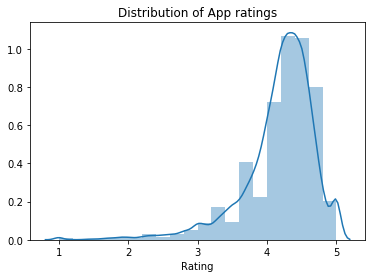

In [71]:
sns.distplot(inpl1.Rating, bins =20)
plt.title('Distribution of App ratings',fontsize = 12)
plt.show()

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [72]:
#Analyse the Content Rating column
inpl1['Content Rating'].value_counts()

Everyone           6943
Teen                933
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [73]:
#Remove the rows with values which are less represented 
# inpl1[(inpl1['Content Rating'] != 'Adults only 18+') & (inpl1['Content Rating'] != 'Unrated')]
inpl1 = inpl1[~(inpl1['Content Rating'].isin(['Adults only 18+','Unrated']))]
inpl1.shape

(8630, 13)

In [74]:
#Reset the index
inpl1.reset_index(inplace = True, drop = True)

In [75]:
#Check the apps belonging to different categories of Content Rating 
inpl1['Content Rating'].value_counts()

Everyone        6943
Teen             933
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

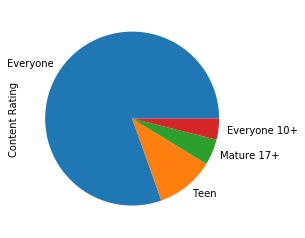

In [76]:
#Plot a pie chart
inpl1['Content Rating'].value_counts().plot.pie()

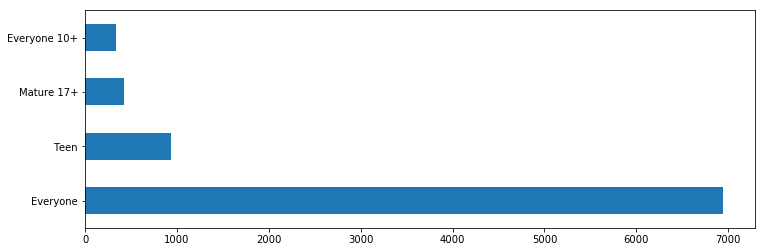

In [77]:
#Plot a bar chart
# plt.bar(inpl1['Content Rating'],inpl1['Content Rating']);
plt.figure(figsize=[12,4])
inpl1['Content Rating'].value_counts().plot.barh()
plt.show()

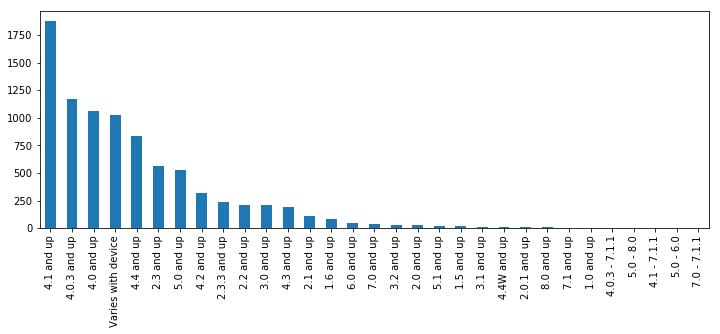

In [78]:
#Question - Plot a bar plot for checking the 4th highest Android version type
plt.figure(figsize=[12,4])
inpl1['Android Ver'].value_counts().plot.bar()
plt.show()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

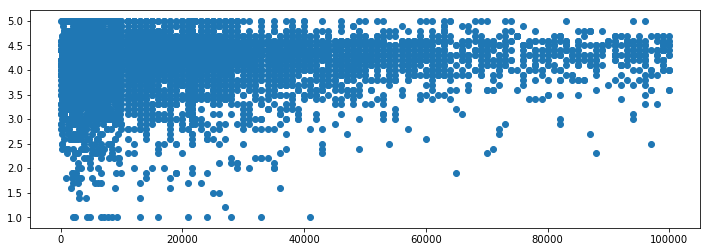

In [79]:
###Size vs Rating
##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.figure(figsize=[12,4])
plt.scatter(inpl1.Size, inpl1.Rating);

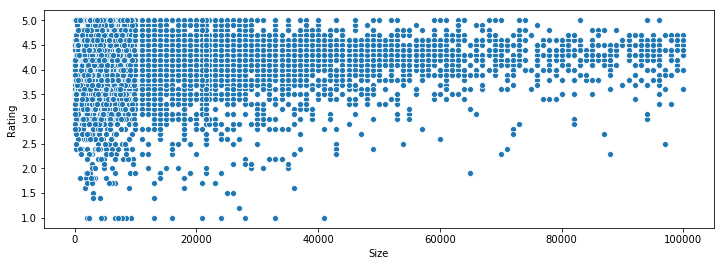

In [80]:
plt.figure(figsize=[12,4])
sns.scatterplot(inpl1.Size, inpl1.Rating);

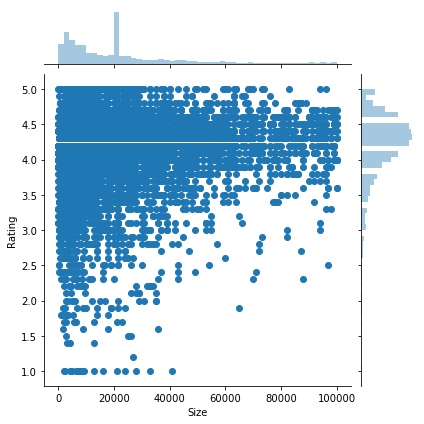

In [81]:
### Plot the same thing now using a jointplot
# plt.figure(figsize = [12,12])
sns.jointplot(inpl1.Size, inpl1.Rating);
plt.show()

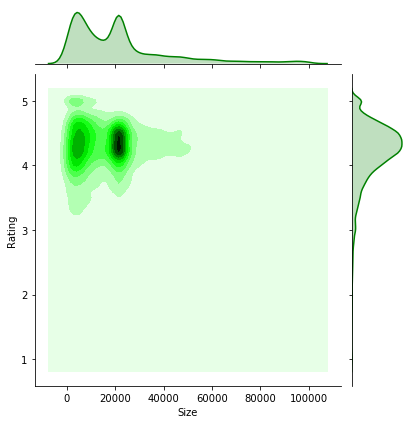

In [82]:
sns.jointplot(inpl1.Size, inpl1.Rating, kind = 'kde',color = 'G'); #color = 'g'
plt.show()

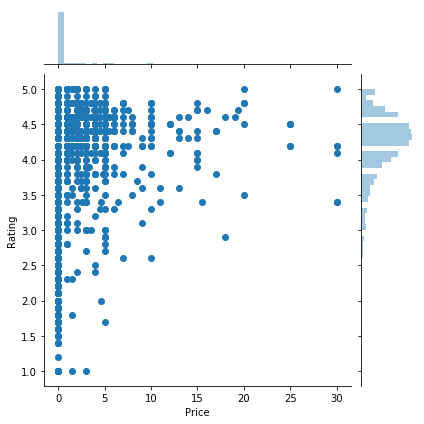

In [83]:
## Plot a jointplot for Price and Rating
sns.jointplot(inpl1.Price, inpl1.Rating);

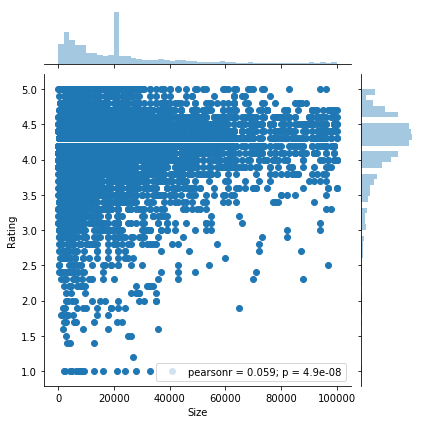

In [84]:
#Import this library
import scipy.stats as stats

#Change the code to the following
sns.jointplot(inpl1.Size, inpl1.Rating, stat_func = stats.pearsonr);

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

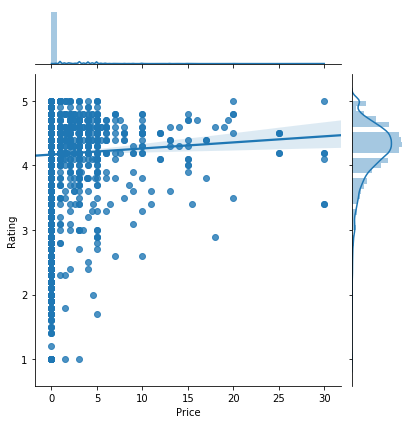

In [85]:
##Plot a reg plot for Price and Rating and observe the trend

sns.jointplot(inpl1.Price, inpl1.Rating, kind = 'reg');
plt.show()

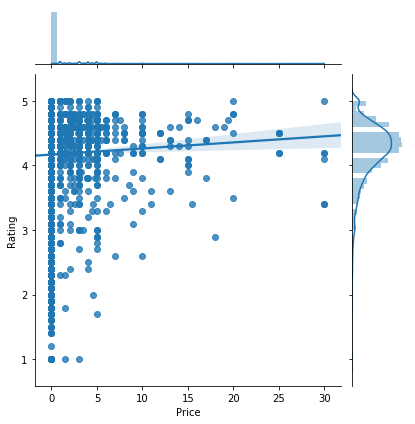

In [86]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.
sns.jointplot(inpl1.Price, inpl1.Rating,data = inpl1[inpl1.Price > 0], kind = 'reg');
plt.show()

**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

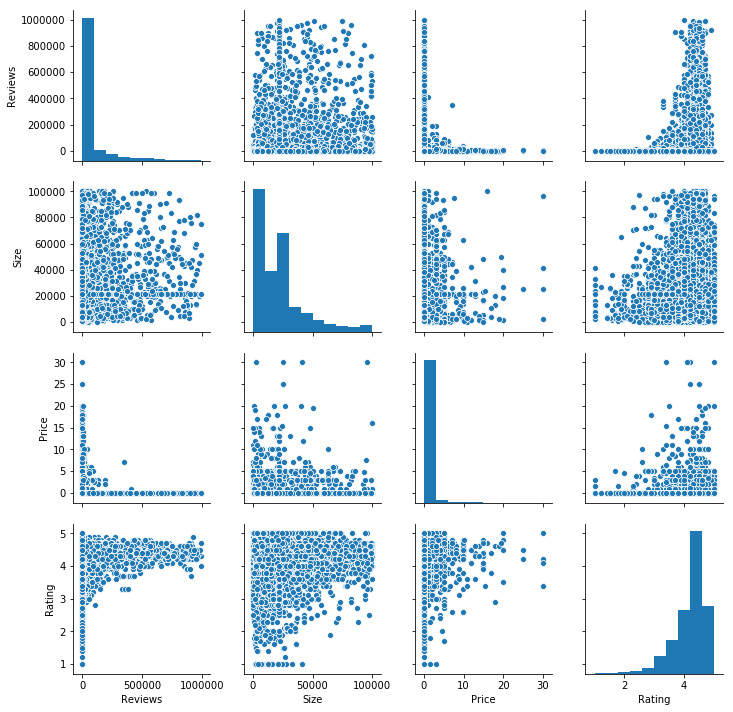

In [87]:
## Create a pair plot for Reviews, Size, Price and Rating
# ?sns.pairplot
# plt.figure(figsize= [3,3])
sns.pairplot(inpl1[['Reviews', 'Size', 'Price', 'Rating']]);

**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

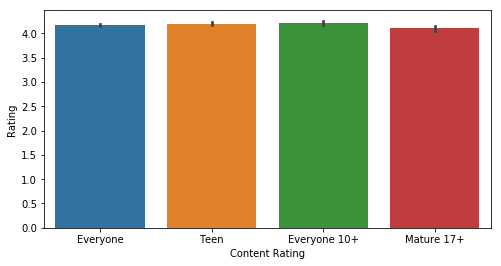

In [88]:
##Plot a bar plot of Content Rating vs Average Rating 
plt.figure(figsize=[8,4])
# inpl1.groupby(['Content Rating'])['Rating'].mean().plot.bar();
sns.barplot(inpl1['Content Rating'],inpl1['Rating']);

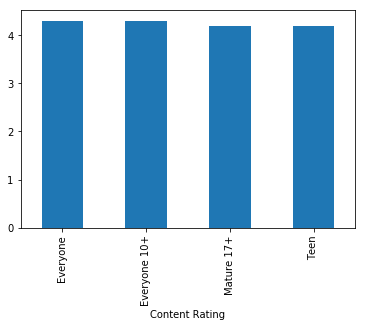

In [89]:
##Plot the bar plot again with Median Rating
inpl1.groupby(['Content Rating'])['Rating'].median().plot.bar();

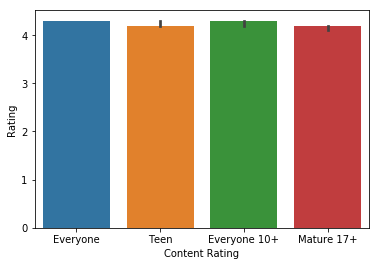

In [90]:
##Plot the above bar plot using the estimator parameter
sns.barplot(inpl1['Content Rating'],inpl1['Rating'], estimator=np.median)

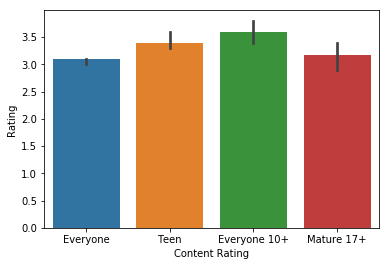

In [91]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(inpl1['Content Rating'],inpl1['Rating'], estimator=lambda x: np.quantile(x,0.05));

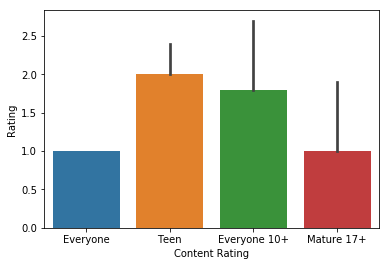

In [92]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(inpl1['Content Rating'],inpl1['Rating'], estimator= np.min)

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




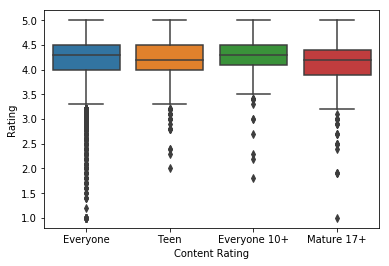

In [93]:
##Plot a box plot of Rating vs Content Rating
sns.boxplot(inpl1['Content Rating'],inpl1['Rating']);
plt.show()

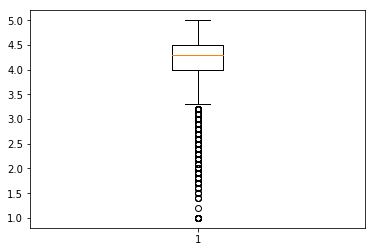

In [94]:
##Question - Plot a box plot for the Rating column only
# sns.boxplot(inpl1['Rating']);
plt.boxplot(inpl1['Rating']);

In [95]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
sort = inpl1.groupby(sorted(['Genres']))['Rating'].count().reset_index().sort_values('Rating',ascending=False)[:4]
f_most = inpl1.loc[inpl1['Genres'].isin(sort.Genres)]
f_most.Genres.value_counts()

Tools            694
Entertainment    508
Education        464
Medical          344
Name: Genres, dtype: int64

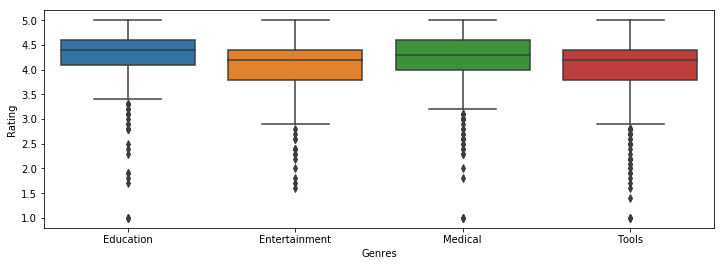

In [96]:
plt.figure(figsize=[12,4])
sns.boxplot(f_most.Genres,f_most.Rating)

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [97]:
# ?pd.qcut # quantile based cut
##Prepare buckets for the Size column using pd.qcut
# dviding inpl1.Size column
inpl1['Size_Bucket'] = pd.qcut(inpl1.Size, [0,.2,.4,.6,.8,1], ["VL",'L','M','H','VH'])

In [98]:
inpl1.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510   8700.0   5000000  Free    0.0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  \
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   
2               Art & Design    August 1, 2018       1.2.4  4.0.3 and up   

  Size_Bucket  
0           M  
1           M  
2           L

In [99]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(inpl1,index = 'Content Rating', columns = 'Size_Bucket', values='Rating')

Size_Bucket           VL         L         M         H        VH
Content Rating                                                  
Everyone        4.117536  4.158405  4.215699  4.170799  4.187396
Everyone 10+    4.189474  4.207407  4.238318  4.193443  4.217073
Mature 17+      3.978947  4.124211  4.021705  4.155172  4.193814
Teen            4.184848  4.233094  4.138408  4.198131  4.246154

In [100]:
##Change the aggregation to median
pd.pivot_table(inpl1,index = 'Content Rating', columns = 'Size_Bucket', values='Rating', aggfunc=np.median)

Size_Bucket       VL    L    M    H   VH
Content Rating                          
Everyone        4.20  4.3  4.3  4.3  4.3
Everyone 10+    4.10  4.3  4.3  4.3  4.3
Mature 17+      4.25  4.2  4.1  4.1  4.2
Teen            4.20  4.3  4.2  4.2  4.3

In [101]:
##Change the aggregation to 20th percentile
pd.pivot_table(inpl1,index='Content Rating',columns='Size_Bucket',values='Rating',aggfunc=lambda x: np.quantile(x,.20))

Size_Bucket       VL     L    M    H   VH
Content Rating                           
Everyone        3.80  3.80  4.0  3.8  3.9
Everyone 10+    3.86  3.92  4.1  4.0  4.0
Mature 17+      3.30  3.68  3.7  3.9  4.0
Teen            3.80  3.90  3.9  4.0  4.0

In [102]:
##Store the pivot table in a separate variable
result=pd.pivot_table(inpl1,index='Content Rating',columns='Size_Bucket',values='Rating',aggfunc=lambda x: np.quantile(x,.20))

In [170]:
result

Size_Bucket       VL     L    M    H   VH
Content Rating                           
Everyone        3.80  3.80  4.0  3.8  3.9
Everyone 10+    3.86  3.92  4.1  4.0  4.0
Mature 17+      3.30  3.68  3.7  3.9  4.0
Teen            3.80  3.90  3.9  4.0  4.0

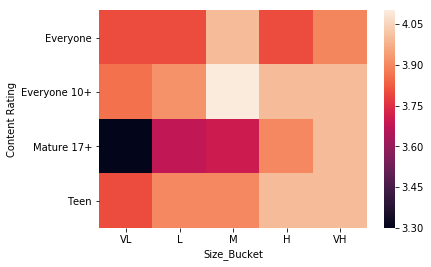

In [117]:
##Ratings vs Size vs Content Rating
sns.heatmap(result);

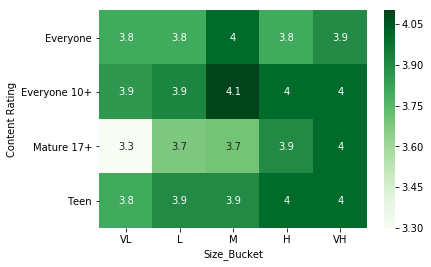

In [104]:
##Apply customisations
sns.heatmap(result, annot= True, cmap = 'Greens');

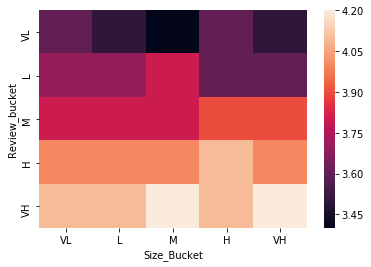

In [121]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating
inpl1['Review_bucket'] = pd.qcut(inpl1.Reviews, [0,.2,.4,.6,.8,1], ["VL",'L','M','H','VH'])
qe = pd.pivot_table(inpl1,index='Review_bucket',columns='Size_Bucket',values='Rating',aggfunc=lambda x: np.quantile(x,.20))
sns.heatmap(qe)

### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [122]:
## Extract the month from the Last Updated Date
inpl1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 15 columns):
App               8630 non-null object
Category          8630 non-null object
Rating            8630 non-null float64
Reviews           8630 non-null int32
Size              8630 non-null float64
Installs          8630 non-null int64
Type              8630 non-null object
Price             8630 non-null float64
Content Rating    8630 non-null object
Genres            8630 non-null object
Last Updated      8630 non-null object
Current Ver       8630 non-null object
Android Ver       8630 non-null object
Size_Bucket       8630 non-null category
Review_bucket     8630 non-null category
dtypes: category(2), float64(3), int32(1), int64(1), object(8)
memory usage: 860.1+ KB


In [131]:
inpl1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [136]:
inpl1['Updated_month'] = pd.to_datetime(inpl1['Last Updated']).dt.month

In [142]:
## Find the average Rating across all the months
ave_Rating_by_month = inpl1.groupby('Updated_month')['Rating'].mean()
ave_Rating_by_month

Updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153308
6     4.172590
7     4.222999
8     4.269286
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

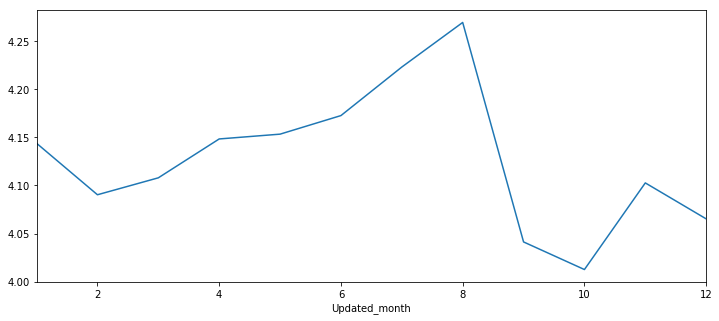

In [144]:
## Plot a line graph
plt.figure(figsize=[12,5])
ave_Rating_by_month.plot();

#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [146]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
##Store the table in a separate variable
monthly = pd.pivot_table(inpl1, index = 'Updated_month', values = 'Installs', columns = 'Content Rating', aggfunc=sum)
monthly

Content Rating    Everyone  Everyone 10+  Mature 17+        Teen
Updated_month                                                   
1                925387390     105282000     9701210    44159010
2                545372005      19821000    13021500    39597710
3                695365520      30322510     9111100    79850310
4                973371180      23300000     5259000   161619410
5               2361067800     118173500    50140100   202689600
6               2427170505     317727100   145257200   415716600
7               8271109680     456556000   419491910  1943556800
8               7430943320     215821000   312981700  6257855650
9                260340410      24931100     2201010    22483100
10               258279680      23101000     3160000    45629210
11               625424710      60310000     1070100    31261100
12               567105770       8410000    12960100    51707100

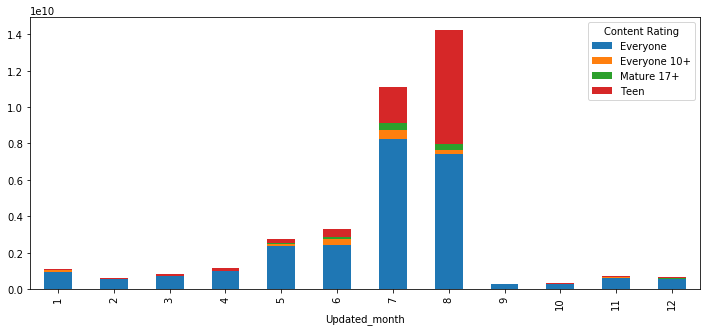

In [151]:
##Plot the stacked bar chart.
monthly.plot(kind = 'bar', stacked = True, figsize=[12,5])
plt.show()

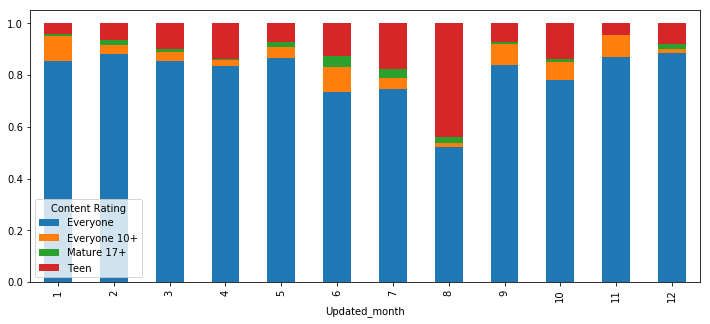

In [157]:
##Plot the stacked bar chart again wrt to the proportions.
#Get proportions/perc instead of absolute values
# monthly_perc = monthly[['Everyone','Everyone 10+','Mature 17+','Teen']].apply(lambda x: x/x.sum(), axis = 1)
monthly_perc = monthly.apply(lambda x: x/x.sum(), axis = 1)
monthly_perc.plot(kind = 'bar', stacked = True, figsize=[12,5])
plt.show()

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [159]:
#Install plotly
import plotly.express as px

In [169]:
#Take the table you want to plot in a separate variable
res = inpl1.groupby('Updated_month')['Rating'].mean().reset_index()
fig = px.line(res,x="Updated_month", y='Rating', title='Monthly average rating')
fig.show()

In [168]:
#Import the plotly libraries


Updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153308
6     4.172590
7     4.222999
8     4.269286
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64